C:\Users\Gabriel\AppData\Local\Temp\ipykernel_14768\1094077781.py:13: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv(players_file, header=0, encoding="utf-8")


Resumen por clúster:
           overall  potential       wage_eur     value_eur        age
cluster                                                              
0        67.063208  67.506261    5368.321407  1.008503e+06  29.856738
1        66.972817  75.342574    6085.427543  2.104451e+06  22.253645
2        84.841176  87.100000  148017.647059  6.125588e+07  26.794118
3        57.609982  67.372766    1355.401520  4.198285e+05  21.338057
4        77.012346  79.464842   38284.272678  1.273001e+07  27.063339

Jugadores con alto potencial y bajo precio:
Empty DataFrame
Columns: [short_name, potential, value_eur, wage_eur, age, cluster]
Index: []


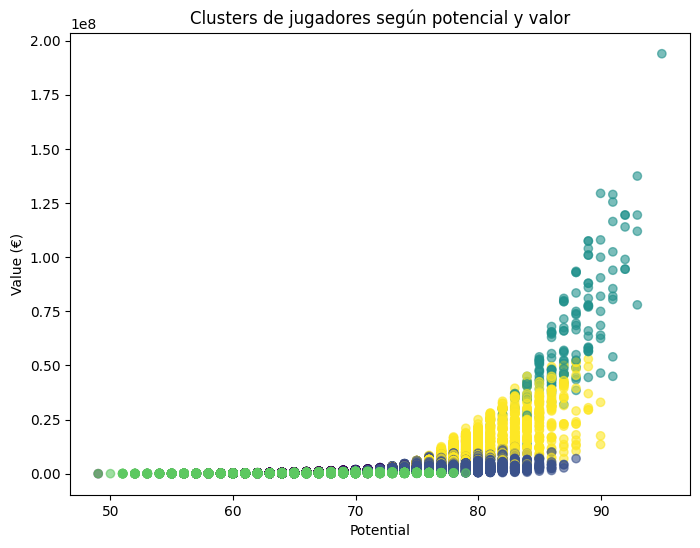

'# -----------------------------\n# 7. Guardar modelo y scaler\n# -----------------------------\njoblib.dump(model, "kmeans_players.pkl")\njoblib.dump(scaler, "scaler_players.pkl")'

In [1]:
import pandas as pd
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import joblib

# -----------------------------
# 1. Cargar los datos
# -----------------------------
base_path = os.getcwd()
players_file = os.path.join(base_path, "Datos", "players_22.csv")
players = pd.read_csv(players_file, header=0, encoding="utf-8")

features = ["overall", "potential", "wage_eur", "value_eur", "age"]
players = players.dropna(subset=features)
data = players[features].copy()

# -----------------------------
# 2. Escalar los datos
# -----------------------------
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# -----------------------------
# 3. Entrenar K-Means
# -----------------------------
n_clusters = 5
model = KMeans(n_clusters=n_clusters, random_state=42)
model.fit(scaled_data)
players["cluster"] = model.labels_

# -----------------------------
# 4. Analizar clústeres
# -----------------------------
cluster_summary = players.groupby("cluster")[["overall", "potential", "wage_eur", "value_eur", "age"]].mean()
print("Resumen por clúster:")
print(cluster_summary)

# -----------------------------
# 5. Identificar clúster objetivo
# -----------------------------
# Condición: alto potential, bajo value_eur y wage_eur
cluster_target = cluster_summary[
    (cluster_summary["potential"] >= cluster_summary["potential"].quantile(0.75)) &
    (cluster_summary["value_eur"] <= cluster_summary["value_eur"].quantile(0.25)) &
    (cluster_summary["wage_eur"] <= cluster_summary["wage_eur"].quantile(0.25))
].index

# Filtrar jugadores del clúster objetivo
jugadores_baratos_con_potencial = players[players["cluster"].isin(cluster_target)]
print("\nJugadores con alto potencial y bajo precio:")
print(jugadores_baratos_con_potencial[["short_name", "potential", "value_eur", "wage_eur", "age", "cluster"]].head(20))

# -----------------------------
# 6. Visualizar clústeres
# -----------------------------
plt.figure(figsize=(8,6))
plt.scatter(
    data["potential"], data["value_eur"],
    c=players["cluster"], cmap="viridis", alpha=0.6
)
plt.xlabel("Potential")
plt.ylabel("Value (€)")
plt.title("Clusters de jugadores según potencial y valor")
plt.show()

"""# -----------------------------
# 7. Guardar modelo y scaler
# -----------------------------
joblib.dump(model, "kmeans_players.pkl")
joblib.dump(scaler, "scaler_players.pkl")"""


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_14768\3787794501.py:16: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv(players_file, header=0, encoding="utf-8")


Resumen por clúster:
         overall  potential   wage_eur    value_eur    age  num_players
cluster                                                                
0          57.32      66.78    1333.26    388706.67  21.51         4500
1          84.39      86.86  137158.42  57638613.86  26.54          202
2          76.55      79.06   35410.37  11388472.62  26.99         2082
3          67.13      67.58    5300.52   1012363.57  29.83         6659
4          66.23      75.08    5273.52   1884760.57  21.98         5722

Clúster objetivo (mejor relación calidad/precio): 2

Jugadores del clúster objetivo:
              short_name  overall  potential   value_eur  wage_eur  age
7               M. Neuer       90         90  13500000.0   86000.0   35
1459           Ansu Fati       76         90  17500000.0   44000.0   18
854       R. Gravenberch       78         90  33000000.0   11000.0   19
661        J. Bellingham       79         89  37000000.0   21000.0   18
855         M. Greenwood     

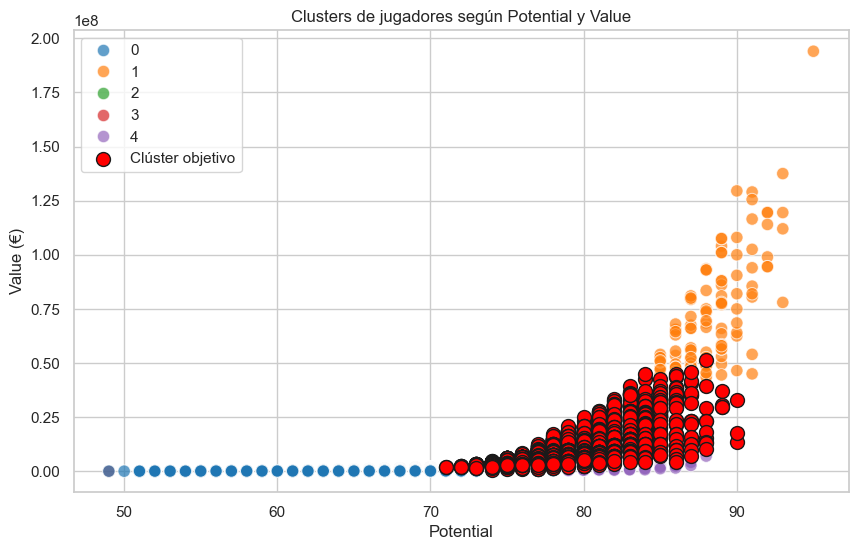

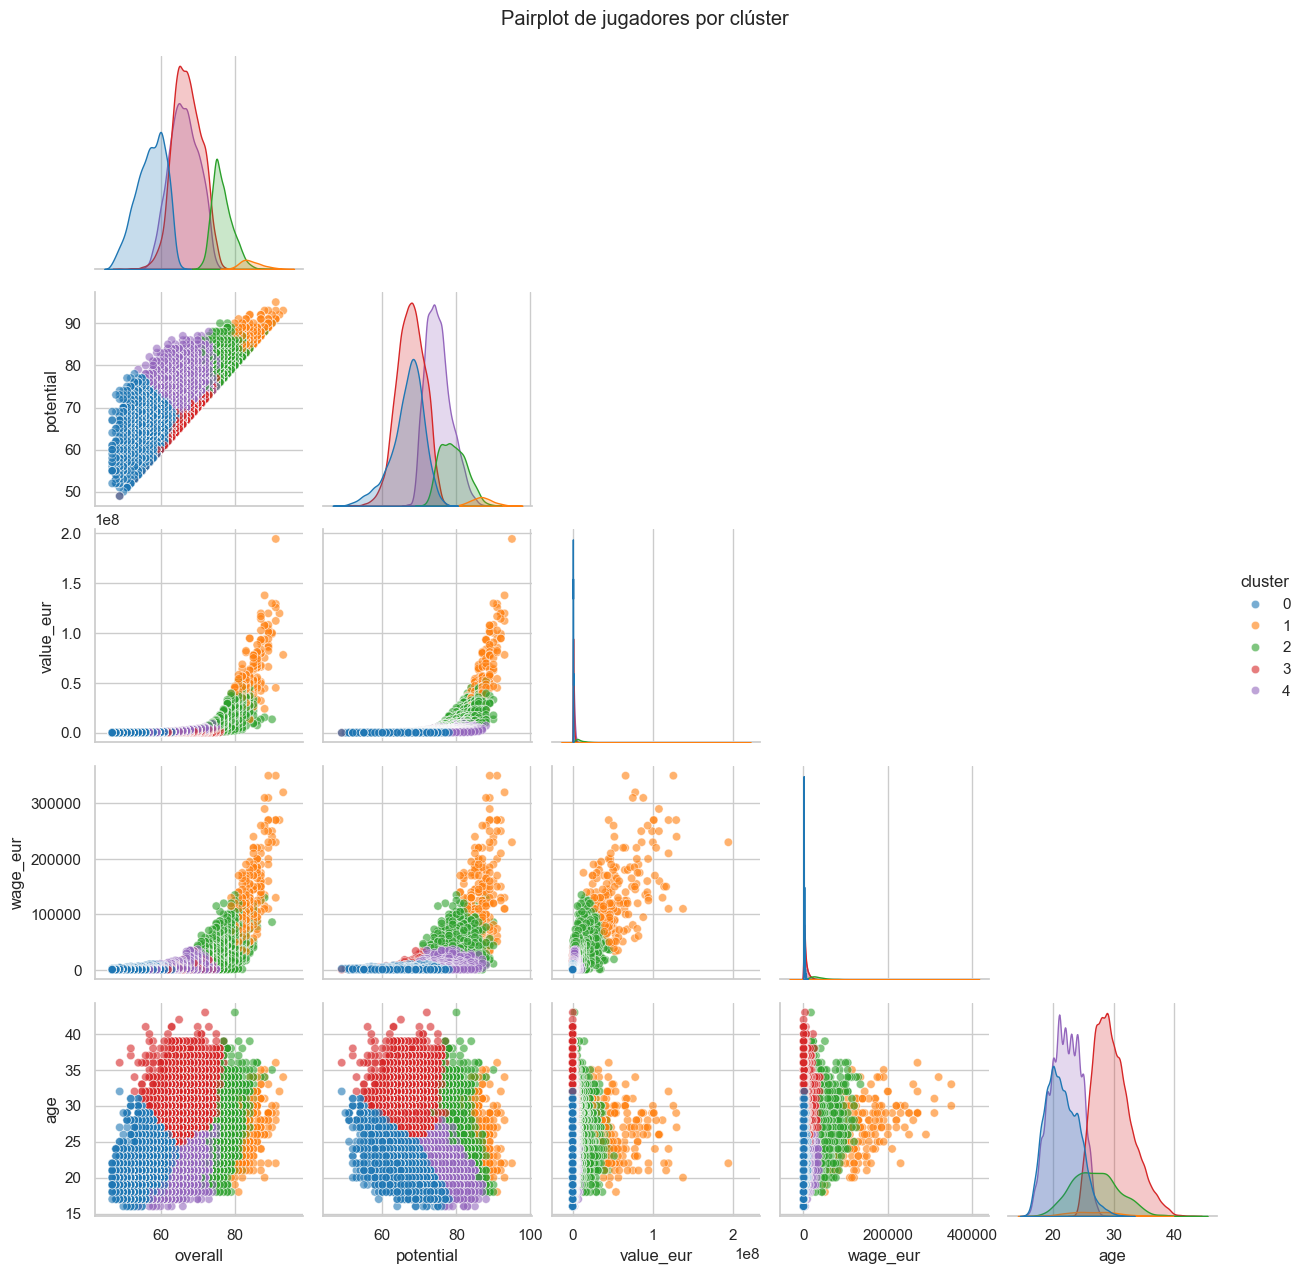

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_14768\3787794501.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="cluster", y=feature, data=players, palette="tab10")
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_14768\3787794501.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="cluster", y=feature, data=players, palette="tab10")
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_14768\3787794501.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="cluster", y=feature, data=players, palette="tab10")
C:\Users\Gabriel\AppData\Local\Tem

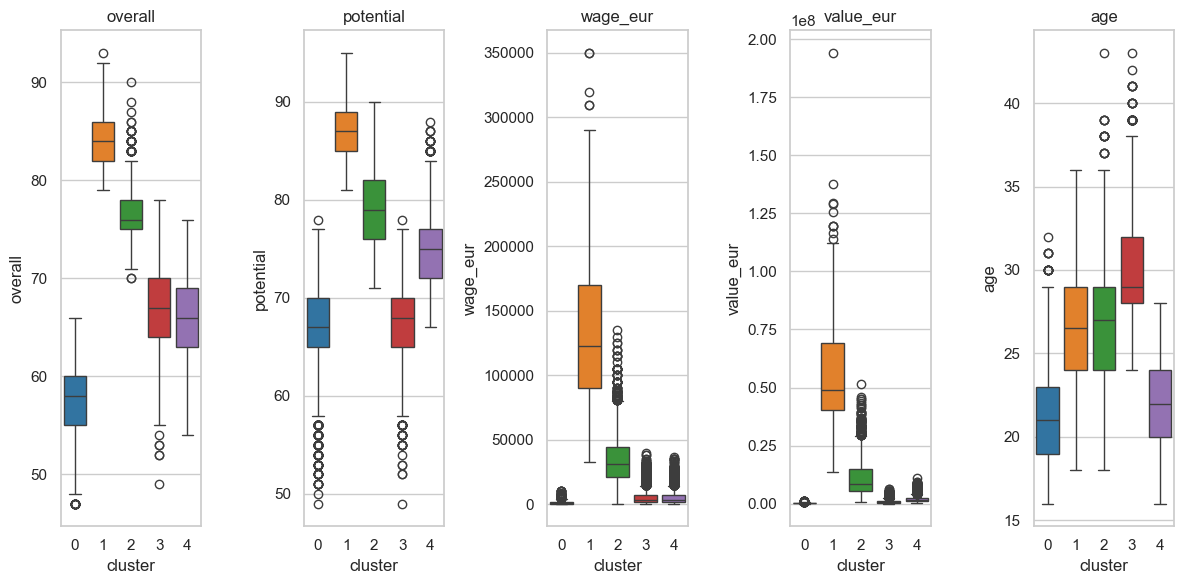

['scaler_players.pkl']

In [2]:
import pandas as pd
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

sns.set(style="whitegrid")

# -----------------------------
# 1. Cargar los datos
# -----------------------------
base_path = os.getcwd()
players_file = os.path.join(base_path, "Datos", "players_22.csv")
players = pd.read_csv(players_file, header=0, encoding="utf-8")

features = ["overall", "potential", "wage_eur", "value_eur", "age"]
players = players.dropna(subset=features)
data = players[features].copy()

# -----------------------------
# 2. Escalar los datos
# -----------------------------
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# -----------------------------
# 3. Entrenar K-Means
# -----------------------------
n_clusters = 5
model = KMeans(n_clusters=n_clusters)
model.fit(scaled_data)
players["cluster"] = model.labels_

# -----------------------------
# 4. Resumen por clúster
# -----------------------------
cluster_summary = players.groupby("cluster")[features].mean().round(2)
cluster_counts = players["cluster"].value_counts().sort_index()
cluster_summary["num_players"] = cluster_counts
print("Resumen por clúster:")
print(cluster_summary)

# -----------------------------
# 5. Detectar el "mejor" clúster automáticamente
# -----------------------------
# Definición: alto potential y overall, bajo wage y value
cluster_summary["score"] = (
    cluster_summary["potential"]*0.4 +
    cluster_summary["overall"]*0.4 -
    cluster_summary["value_eur"]/1e6*0.1 -
    cluster_summary["wage_eur"]/1e3*0.1
)
best_cluster = cluster_summary["score"].idxmax()
print(f"\nClúster objetivo (mejor relación calidad/precio): {best_cluster}")

jugadores_objetivo = players[players["cluster"] == best_cluster]
print("\nJugadores del clúster objetivo:")
print(jugadores_objetivo[["short_name", "overall", "potential", "value_eur", "wage_eur", "age"]].sort_values(
    by="potential", ascending=False).head(20))

# -----------------------------
# 6. Visualización mejorada
# -----------------------------
# Scatter plot: Potential vs Value
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=players, x="potential", y="value_eur",
    hue="cluster", palette="tab10", alpha=0.7, s=80
)
plt.scatter(
    jugadores_objetivo["potential"], jugadores_objetivo["value_eur"],
    color="red", s=100, label="Clúster objetivo", edgecolor="k"
)
plt.title("Clusters de jugadores según Potential y Value")
plt.xlabel("Potential")
plt.ylabel("Value (€)")
plt.legend()
plt.show()

# Pairplot de variables principales
sns.pairplot(players, vars=["overall", "potential", "value_eur", "wage_eur", "age"],
             hue="cluster", palette="tab10", corner=True, plot_kws={"alpha":0.6})
plt.suptitle("Pairplot de jugadores por clúster", y=1.02)
plt.show()

# Boxplot de features por clúster
plt.figure(figsize=(12,6))
for i, feature in enumerate(features):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(x="cluster", y=feature, data=players, palette="tab10")
    plt.title(feature)
plt.tight_layout()
plt.show()

# -----------------------------
# 7. Guardar modelo y scaler
# -----------------------------
joblib.dump(model, "kmeans_players.pkl")
joblib.dump(scaler, "scaler_players.pkl")
